<a href="https://colab.research.google.com/github/CarolineJoi3375/RTA/blob/main/Appendix_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Decision tree clasifier without SMOTE

# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# print the count of train dataset
print(y_train.value_counts())

#Build Decision Tree Model using Scikit Learn
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()
# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = dtc.predict(X_test)

#Evaluate the accuracy of the model for prediction
#Model Accuracy, how often is the classifier correct?
print("\n")
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred))

# classification report on test dataset
classif_re = classification_report(y_test, y_pred)
print(classif_re)
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("f1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
#print("\n")

casualty_severity
3    16817
2     2308
1      150
Name: count, dtype: int64


Decision Tree Accuracy: 0.7979663478997701
              precision    recall  f1-score   support

           1       0.09      0.12      0.10        58
           2       0.24      0.25      0.25      1025
           3       0.89      0.88      0.89      7178

    accuracy                           0.80      8261
   macro avg       0.41      0.42      0.41      8261
weighted avg       0.80      0.80      0.80      8261

Precision: 0.8035614694425957
Recall: 0.7979663478997701
f1 Score: 0.8007154653155115


In [ ]:
#Decision tree clasifier Hyperparameter Tuning - RandomizedSearchCV check best parameters

# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

param_grid = {
    'max_features': ['sqrt', 'log2', None],
    'max_depth': randint(1,25),
    'criterion' : ('gini', 'entropy'),
    'min_samples_split' : randint(2,10),
    'min_samples_leaf' : randint(1,10),
}

dtrandom_search = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, cv=3, random_state=42)
dtrandom_search.fit(X_train, y_train)
print(dtrandom_search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       min_samples_leaf=5, min_samples_split=3)


In [ ]:
#Decision Tree classifier Hyperparameter Tuning - RandomizedSearchCV

# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# print the count of train dataset
print(y_train.value_counts())

#Build Decision Tree Model using Scikit Learn
# instantiate the classifier with best params
dtc_rs = DecisionTreeClassifier(criterion='entropy',
                                max_depth=3,
                                max_features='log2',
                                min_samples_leaf=5,
                                min_samples_split=3,
                                random_state=42)

# Train Decision Tree Classifer
dtc_rs = dtc_rs.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = dtc_rs.predict(X_test)

#Evaluate the accuracy of the model for prediction
#Model Accuracy, how often is the classifier correct?
print("\n")
print("Decision Tree RandomizedSearchCV Accuracy:", metrics.accuracy_score(y_test, y_pred))

# classification report on test dataset
classif_re = classification_report(y_test, y_pred)
print(classif_re)
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("f1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
#print("\n")

casualty_severity
3    16817
2     2308
1      150
Name: count, dtype: int64


Decision Tree RandomizedSearchCV Accuracy: 0.8689020699673163
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        58
           2       0.00      0.00      0.00      1025
           3       0.87      1.00      0.93      7178

    accuracy                           0.87      8261
   macro avg       0.29      0.33      0.31      8261
weighted avg       0.75      0.87      0.81      8261

Precision: 0.754990807193487
Recall: 0.8689020699673163
f1 Score: 0.8079511701827057


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

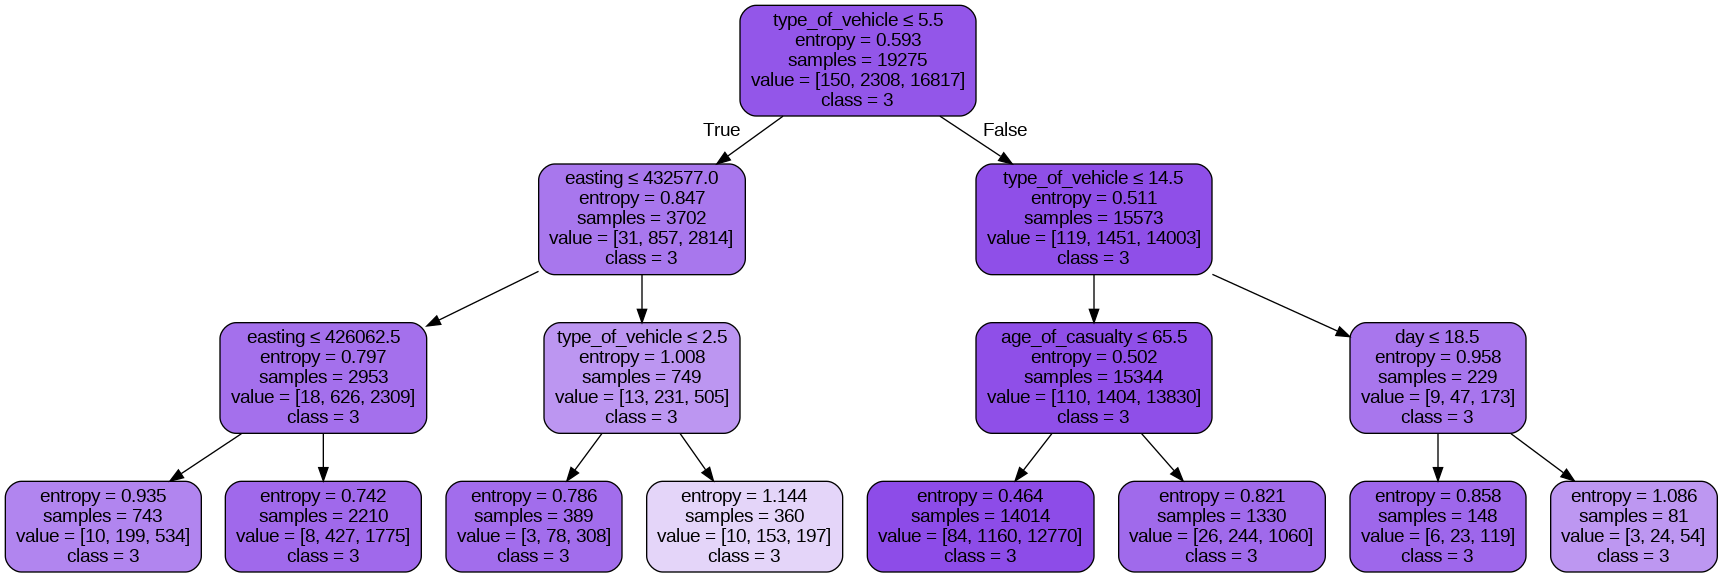

In [ ]:
#Decision Tree classifier Hyperparameter Tuning - RandomizedSearchCV with visualisation

# Load libraries
import io
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import graphviz

feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']

dot_data = StringIO()
export_graphviz(dtc_rs, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2','3'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue().replace("\n", ""))
graph.write_png('DTRandomizedSearchCV.png')
Image(graph.create_png())

In [ ]:
#Decision tree clasifier Hyperparameter Tuning - GridSearchCV check best parameters

# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

param_grid = {
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [2,4,6,8,10,20,30, None],
    'criterion' : ('gini', 'entropy'),
    'min_samples_split' : [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10],
    'random_state' : [42]
}

dtgrid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3)
dtgrid_search.fit(X_train, y_train)
print(dtgrid_search.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


In [ ]:
#Decision Tree classifier Hyperparameter Tuning - GridSearchCV

# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# print the count of train dataset
print(y_train.value_counts())

#Build Decision Tree Model using Scikit Learn
# instantiate the classifier with best params
dtc_grid = DecisionTreeClassifier(criterion='gini',
                                max_depth=2,
                                max_features='sqrt',
                                min_samples_leaf=1,
                                min_samples_split=2,
                                random_state=42)

# Train Decision Tree Classifer
dtc_grid = dtc_grid.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = dtc_grid.predict(X_test)

#Evaluate the accuracy of the model for prediction
#Model Accuracy, how often is the classifier correct?
print("\n")
print("Decision Tree GridSearchCV Accuracy:", metrics.accuracy_score(y_test, y_pred))

# classification report on test dataset
classif_re = classification_report(y_test, y_pred)
print(classif_re)
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("f1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
#print("\n")

casualty_severity
3    16817
2     2308
1      150
Name: count, dtype: int64


Decision Tree GridSearchCV Accuracy: 0.8689020699673163
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        58
           2       0.00      0.00      0.00      1025
           3       0.87      1.00      0.93      7178

    accuracy                           0.87      8261
   macro avg       0.29      0.33      0.31      8261
weighted avg       0.75      0.87      0.81      8261

Precision: 0.754990807193487
Recall: 0.8689020699673163
f1 Score: 0.8079511701827057


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

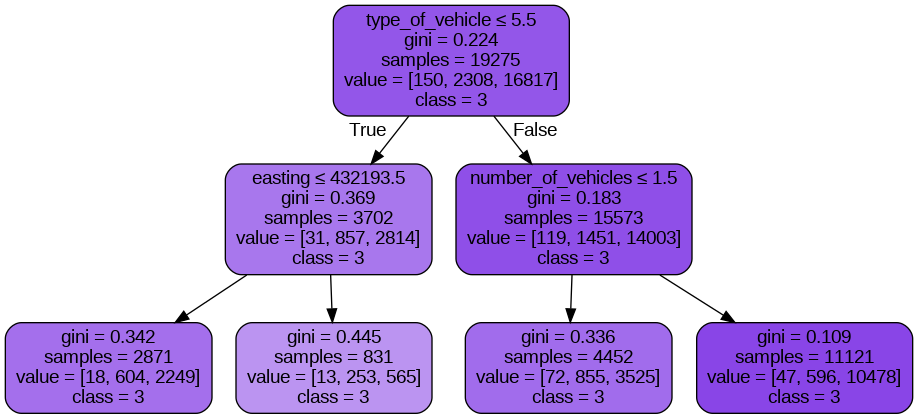

In [ ]:
#Decision Tree classifier Hyperparameter Tuning - GridSearchCV with visualisation

# Load libraries
import io
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import graphviz

feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']

dot_data = StringIO()
export_graphviz(dtc_grid, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2','3'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue().replace("\n", ""))
graph.write_png('DTGridSearchCV.png')
Image(graph.create_png())

In [ ]:
#Decision tree clasifier with SMOTE

# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# We can use the SMOTE algorithm to oversample the minority class.
from imblearn.over_sampling import SMOTE
# Create an instance of the SMOTE algorithm
smote = SMOTE()
# Oversample the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# print the count of train dataset
print("Before SMOTE:",y_train.value_counts())
print("After SMOTE:",y_train_smote.value_counts())

#Build Decision Tree Model using Scikit Learn
# Create Decision Tree classifer object
dtc_smote = DecisionTreeClassifier()
# Train Decision Tree Classifer
dtc_smote = dtc_smote.fit(X_train_smote,y_train_smote)
#Predict the response for test dataset
y_pred = dtc.predict(X_test)

#Evaluate the accuracy of the model for prediction
#Model Accuracy, how often is the classifier correct?
print("\n")
print("Decision Tree with SMOTE Accuracy:", metrics.accuracy_score(y_test, y_pred))

# classification report on test dataset
classif_re = classification_report(y_test, y_pred)
print(classif_re)
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("f1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
#print("\n")

Before SMOTE: casualty_severity
3    16817
2     2308
1      150
Name: count, dtype: int64
After SMOTE: casualty_severity
2    16817
3    16817
1    16817
Name: count, dtype: int64


Decision Tree with SMOTE Accuracy: 0.7979663478997701
              precision    recall  f1-score   support

           1       0.09      0.12      0.10        58
           2       0.24      0.25      0.25      1025
           3       0.89      0.88      0.89      7178

    accuracy                           0.80      8261
   macro avg       0.41      0.42      0.41      8261
weighted avg       0.80      0.80      0.80      8261

Precision: 0.8035614694425957
Recall: 0.7979663478997701
f1 Score: 0.8007154653155115


In [ ]:
#Decision tree clasifier Hyperparameter Tuning - RandomizedSearchCV with SMOTE check best parameters

# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# We can use the SMOTE algorithm to oversample the minority class.
from imblearn.over_sampling import SMOTE
# Create an instance of the SMOTE algorithm
smote = SMOTE()
# Oversample the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# print the count of train dataset
print("Before SMOTE:",y_train.value_counts())
print("After SMOTE:",y_train_smote.value_counts())

param_grid = {
    'max_features': ['sqrt', 'log2', None],
    'max_depth': randint(1,25),
    'criterion' : ('gini', 'entropy'),
    'min_samples_split' : randint(2,10),
    'min_samples_leaf' : randint(1,10),
}

dtrandomsmote_search = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, cv=3, random_state=42)
dtrandomsmote_search.fit(X_train_smote, y_train_smote)
print(dtrandomsmote_search.best_estimator_)

Before SMOTE: casualty_severity
3    16817
2     2308
1      150
Name: count, dtype: int64
After SMOTE: casualty_severity
2    16817
3    16817
1    16817
Name: count, dtype: int64
DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_leaf=3,
                       min_samples_split=5)


In [ ]:
#Decision Tree classifier Hyperparameter Tuning - RandomizedSearchCV with SMOTE

# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# We can use the SMOTE algorithm to oversample the minority class.
from imblearn.over_sampling import SMOTE
# Create an instance of the SMOTE algorithm
smote = SMOTE()
# Oversample the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# print the count of train dataset
print("Before SMOTE:",y_train.value_counts())
print("After SMOTE:",y_train_smote.value_counts())

#Build Decision Tree Model using Scikit Learn
# instantiate the classifier with best params
dtcsmote_rs = DecisionTreeClassifier(criterion='entropy',
                                max_depth=17,
                                max_features=None,
                                min_samples_leaf=3,
                                min_samples_split=5,
                                random_state=42)

# Train Decision Tree Classifer
dtcsmote_rs = dtcsmote_rs.fit(X_train_smote,y_train_smote)
#Predict the response for test dataset
y_pred = dtcsmote_rs.predict(X_test)

#Evaluate the accuracy of the model for prediction
#Model Accuracy, how often is the classifier correct?
print("\n")
print("Decision Tree RandomizedSearchCV with SMOTE Accuracy:", metrics.accuracy_score(y_test, y_pred))

# classification report on test dataset
classif_re = classification_report(y_test, y_pred)
print(classif_re)
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("f1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
#print("\n")

Before SMOTE: casualty_severity
3    16817
2     2308
1      150
Name: count, dtype: int64
After SMOTE: casualty_severity
2    16817
3    16817
1    16817
Name: count, dtype: int64


Decision Tree RandomizedSearchCV with SMOTE Accuracy: 0.7246096114271879
              precision    recall  f1-score   support

           1       0.05      0.19      0.07        58
           2       0.21      0.37      0.27      1025
           3       0.90      0.78      0.84      7178

    accuracy                           0.72      8261
   macro avg       0.39      0.45      0.39      8261
weighted avg       0.81      0.72      0.76      8261

Precision: 0.809070396911428
Recall: 0.7246096114271879
f1 Score: 0.7599548406874297


In [ ]:
#Decision tree clasifier Hyperparameter Tuning - GridSearchCV with SMOTE check best parameters

# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# We can use the SMOTE algorithm to oversample the minority class.
from imblearn.over_sampling import SMOTE
# Create an instance of the SMOTE algorithm
smote = SMOTE()
# Oversample the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# print the count of train dataset
print("Before SMOTE:",y_train.value_counts())
print("After SMOTE:",y_train_smote.value_counts())

param_grid = {
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10,20,25,30,35,40,50,55, None],
    'criterion' : ('gini', 'entropy'),
    'min_samples_split' : [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10],
    'random_state' : [42]
}

dtgridsmote_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3)
dtgridsmote_search.fit(X_train_smote, y_train_smote)
print(dtgridsmote_search.best_params_)

Before SMOTE: casualty_severity
3    16817
2     2308
1      150
Name: count, dtype: int64
After SMOTE: casualty_severity
2    16817
3    16817
1    16817
Name: count, dtype: int64
{'criterion': 'gini', 'max_depth': 35, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


In [ ]:
#Decision Tree classifier Hyperparameter Tuning - GridSearchCV with SMOTE

# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, f1_score


#Read in the dataset and display
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/RTA_Final.xlsx')

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['easting', 'northing', 'number_of_vehicles', 'year', 'month', 'day','time_(24hr)','1st_road_class', 'road_surface',
'lighting_conditions', 'weather_conditions', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle']
X = dataset[feature_cols] # Features
Y = dataset['casualty_severity'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# We can use the SMOTE algorithm to oversample the minority class.
from imblearn.over_sampling import SMOTE
# Create an instance of the SMOTE algorithm
smote = SMOTE()
# Oversample the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# print the count of train dataset
print("Before SMOTE:",y_train.value_counts())
print("After SMOTE:",y_train_smote.value_counts())

#Build Decision Tree Model using Scikit Learn
# instantiate the classifier with best params
dtcsmote_rs = DecisionTreeClassifier(criterion='gini',
                                max_depth=35,
                                max_features=None,
                                min_samples_leaf=1,
                                min_samples_split=2,
                                random_state=42)

# Train Decision Tree Classifer
dtcsmote_rs = dtcsmote_rs.fit(X_train_smote,y_train_smote)
#Predict the response for test dataset
y_pred = dtcsmote_rs.predict(X_test)

#Evaluate the accuracy of the model for prediction
#Model Accuracy, how often is the classifier correct?
print("\n")
print("Decision Tree GridSearchCV with SMOTE Accuracy:", metrics.accuracy_score(y_test, y_pred))

# classification report on test dataset
classif_re = classification_report(y_test, y_pred)
print(classif_re)
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("f1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
#print("\n")

Before SMOTE: casualty_severity
3    16817
2     2308
1      150
Name: count, dtype: int64
After SMOTE: casualty_severity
2    16817
3    16817
1    16817
Name: count, dtype: int64


Decision Tree GridSearchCV with SMOTE Accuracy: 0.7433724730662148
              precision    recall  f1-score   support

           1       0.04      0.10      0.05        58
           2       0.22      0.35      0.27      1025
           3       0.90      0.80      0.85      7178

    accuracy                           0.74      8261
   macro avg       0.38      0.42      0.39      8261
weighted avg       0.81      0.74      0.77      8261

Precision: 0.8072773881567126
Recall: 0.7433724730662148
f1 Score: 0.7709560827430855
